<a href="https://colab.research.google.com/github/aneesAyy/hello-world/blob/master/dip_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import random
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import math
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from sklearn.metrics import f1_score

In [4]:
training_file_path = '/content/drive/MyDrive/Colab Notebooks/Segmentation/train_images.npy'
training_labels_path = '/content/drive/MyDrive/Colab Notebooks/Segmentation/training_labels_path.npy'
testing_file_path = '/content/drive/MyDrive/Colab Notebooks/Segmentation/test_images.npy'
testing_labels_path = '/content/drive/MyDrive/Colab Notebooks/Segmentation/testing_labels_path.npy'

training_images, training_masks, testing_images, testing_masks = np.load(training_file_path), np.load(training_labels_path), np.load(testing_file_path), np.load(testing_labels_path) 

print('Shape of training images and training lables is: ', training_images.shape, ',', training_masks.shape)
print('Shape of testing images and testing lables is: ', testing_images.shape, ',', testing_masks.shape)

Shape of training images and training lables is:  (762, 256, 256, 3) , (762, 256, 256)
Shape of testing images and testing lables is:  (76, 256, 256, 3) , (76, 256, 256)


In [5]:
# https://idiotdeveloper.com/unet-implementation-in-tensorflow-using-keras-api/
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 16)
    s2, p2 = encoder_block(p1, 32)
    s3, p3 = encoder_block(p2, 64)
    s4, p4 = encoder_block(p3, 128)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 128)
    d2 = decoder_block(d1, s3, 64)
    d3 = decoder_block(d2, s2, 32)
    d4 = decoder_block(d3, s1, 16)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

model = build_unet((256, 256, 3))
model.summary()


Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [6]:
my_optimiser = Adam(lr=0.00001)
model.compile(loss='BinaryCrossentropy', optimizer=my_optimiser, metrics='accuracy')
epochs = 50

print('Training Models...')

my_model_history = model.fit(
        x=training_images, y=training_masks, epochs=epochs, validation_split = 0.1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training...
Epoch 1/50
22/22 [==============================] - 30s 515ms/step - loss: 22.7870 - accuracy: 0.3974 - val_loss: -35.1592 - val_accuracy: 0.1698
Epoch 2/50
22/22 [==============================] - 8s 360ms/step - loss: 12.5011 - accuracy: 0.4199 - val_loss: -11.9599 - val_accuracy: 0.2079
Epoch 3/50
22/22 [==============================] - 8s 364ms/step - loss: 1.2989 - accuracy: 0.4544 - val_loss: -3.1803 - val_accuracy: 0.2532
Epoch 4/50
22/22 [==============================] - 8s 369ms/step - loss: -10.4784 - accuracy: 0.4929 - val_loss: 1.1970 - val_accuracy: 0.3070
Epoch 5/50
22/22 [==============================] - 8s 369ms/step - loss: -22.3312 - accuracy: 0.5288 - val_loss: 3.7094 - val_accuracy: 0.3970
Epoch 6/50
22/22 [==============================] - 8s 372ms/step - loss: -33.9059 - accuracy: 0.5579 - val_loss: 5.0576 - val_accuracy: 0.5136
Epoch 7/50
22/22 [==============================] - 8s 367ms/step - loss: -44.9354 - accuracy: 0.5757 - val_loss: 5.4353 -

In [9]:
imageTest = np.load(testing_file_path)

In [10]:
imageTest.shape

(76, 256, 256, 3)

In [11]:
imagePredict = model.predict(imageTest)

In [12]:
imagePredict.shape

(76, 256, 256, 1)

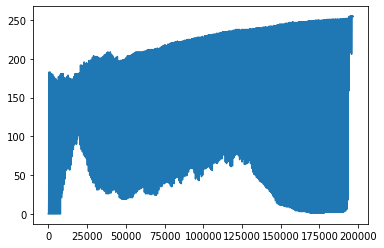

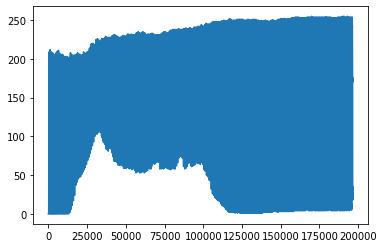

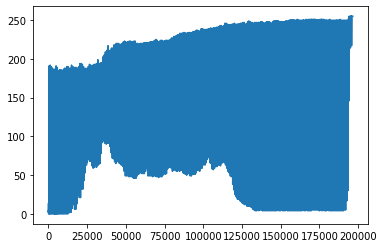

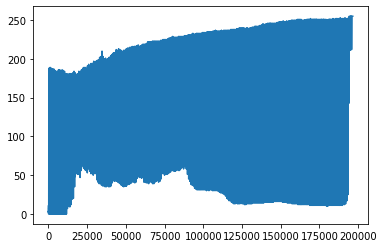

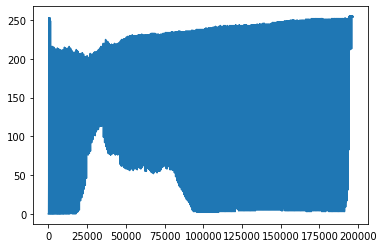

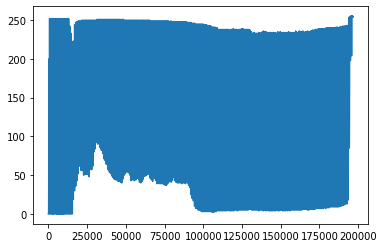

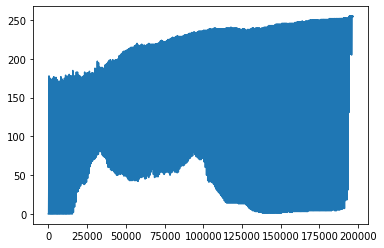

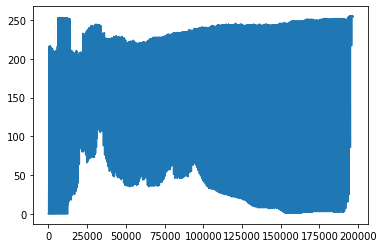

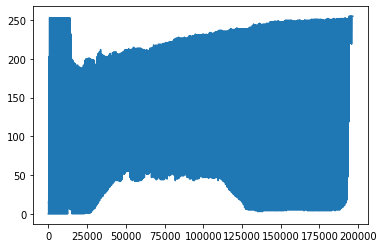

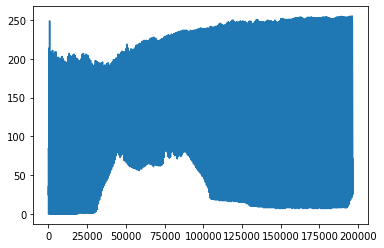

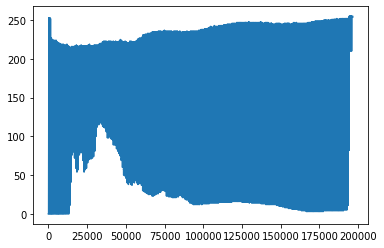

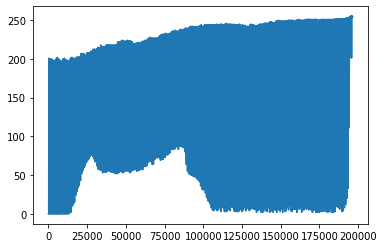

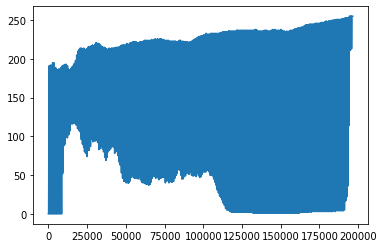

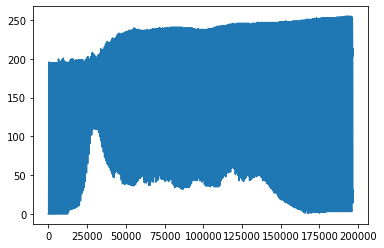

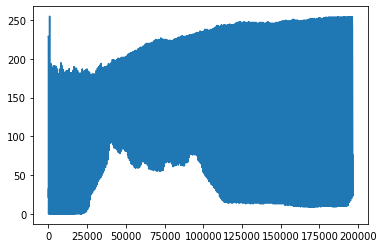

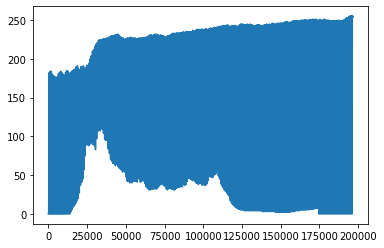

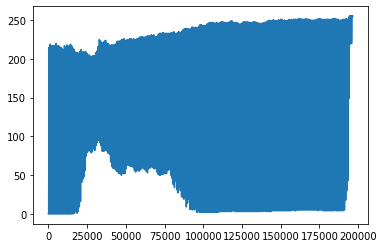

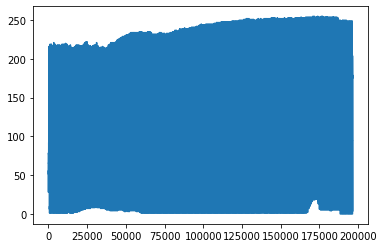

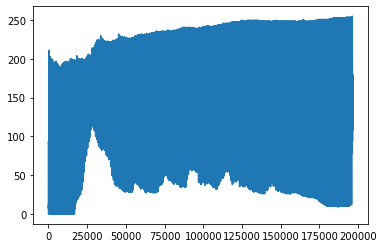

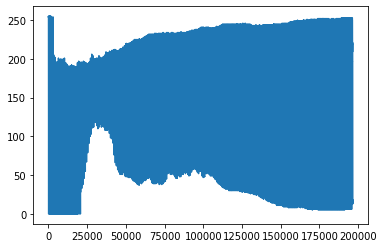

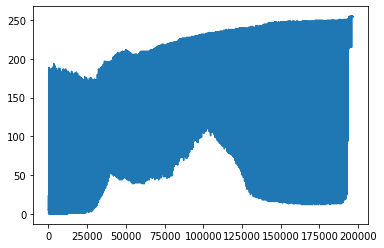

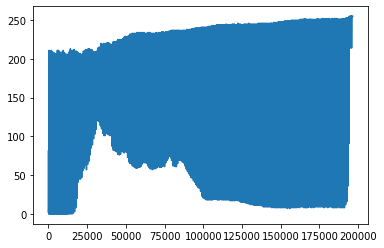

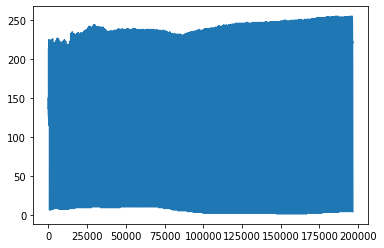

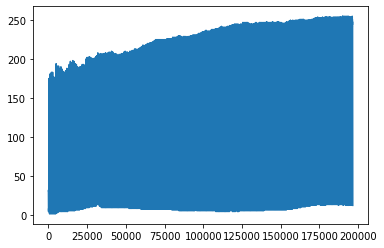

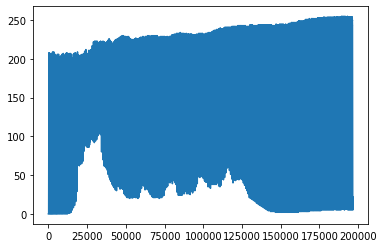

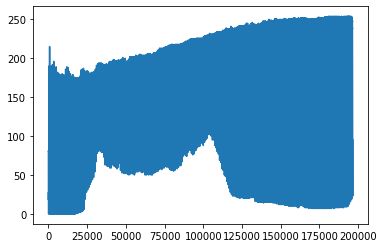

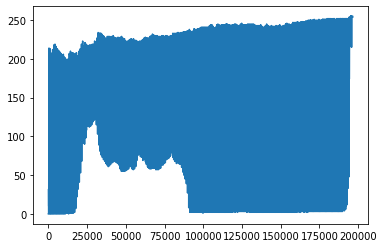

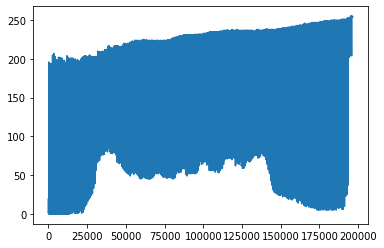

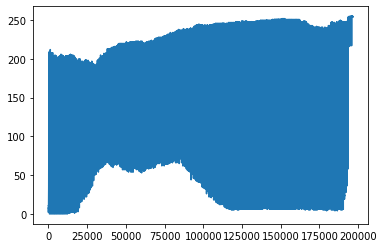

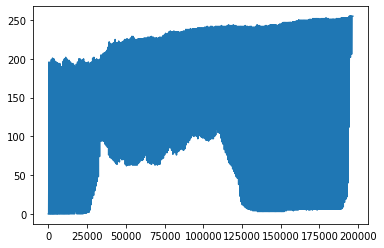

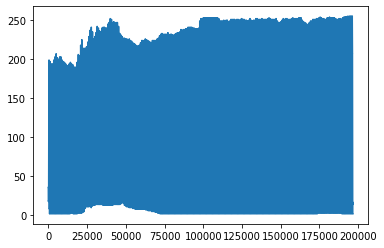

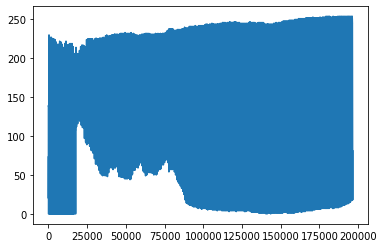

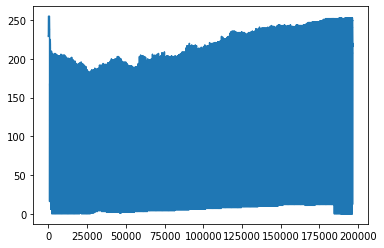

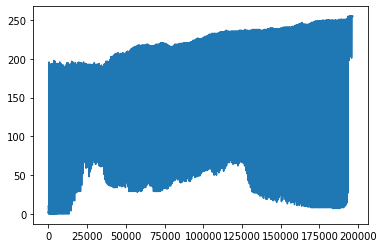

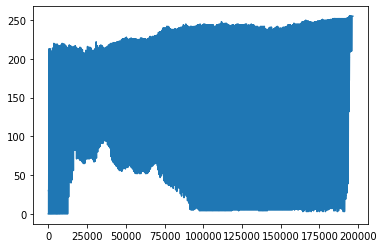

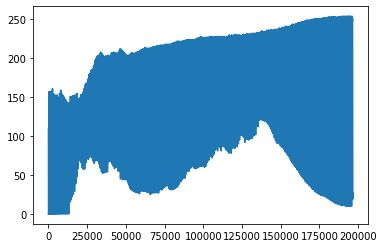

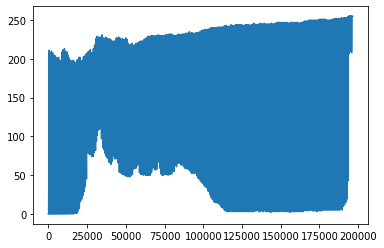

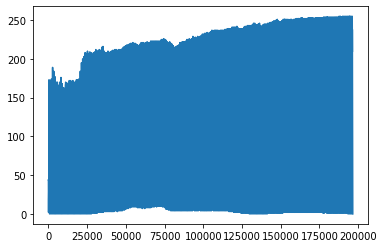

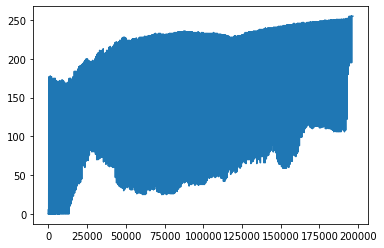

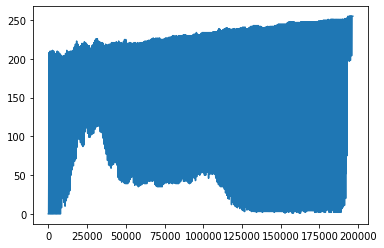

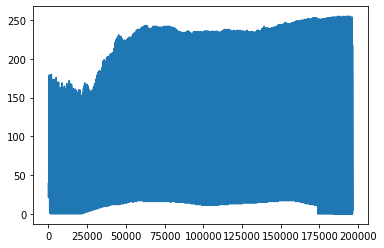

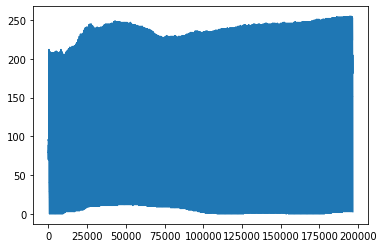

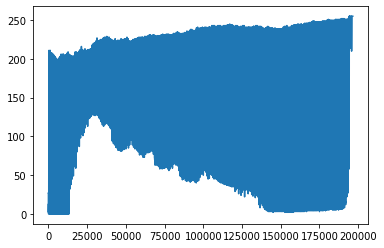

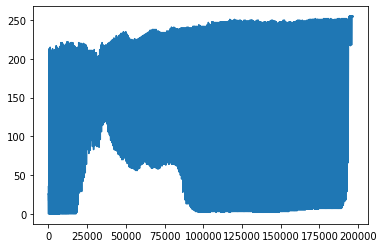

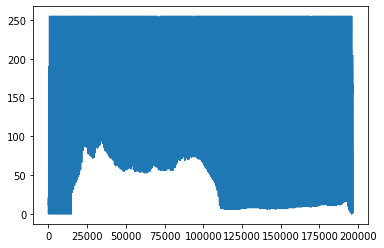

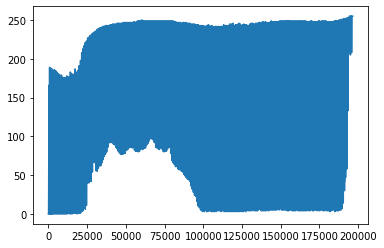

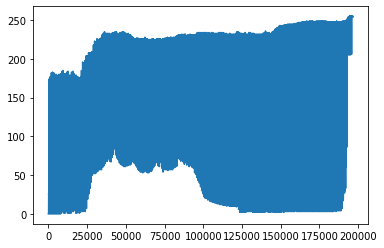

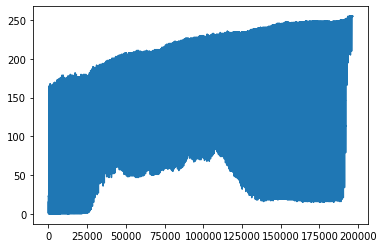

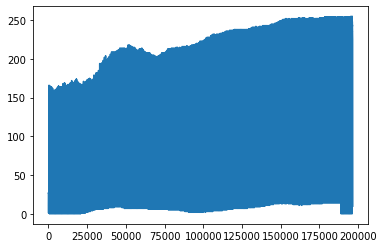

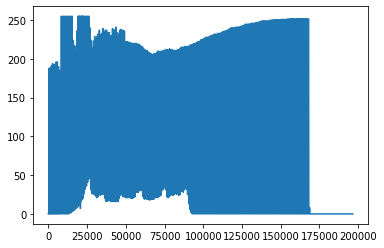

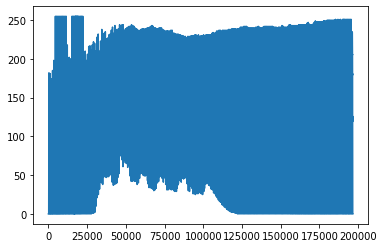

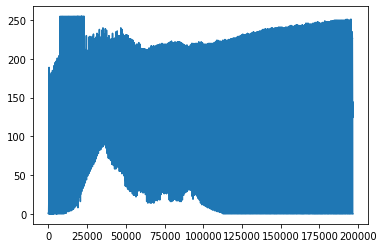

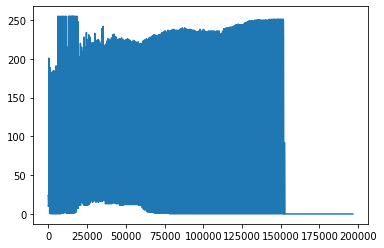

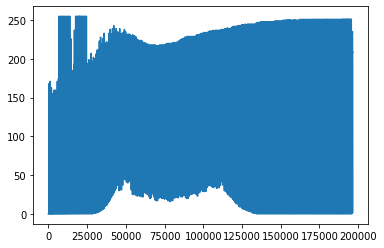

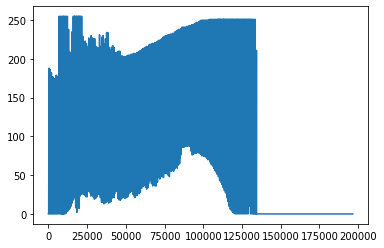

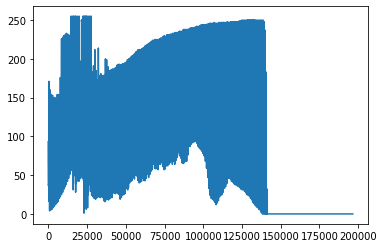

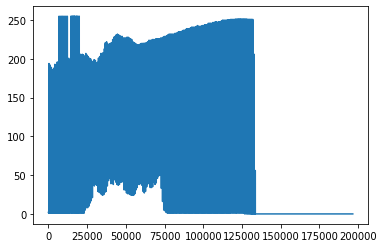

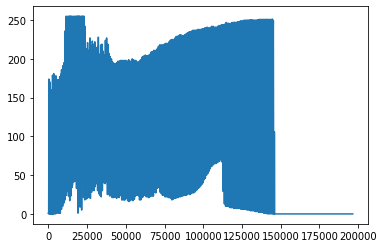

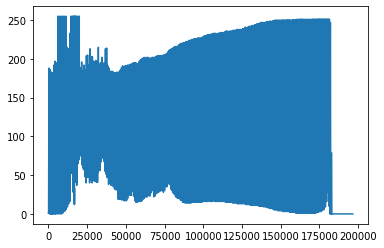

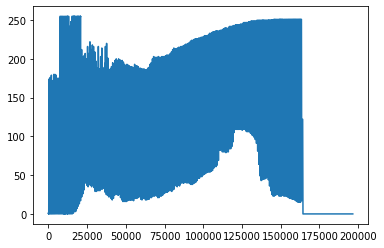

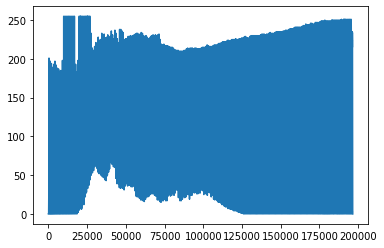

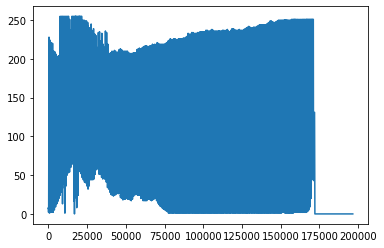

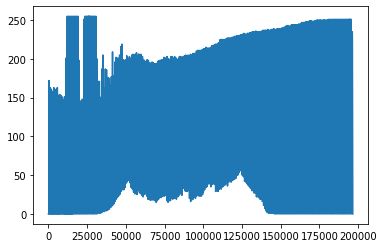

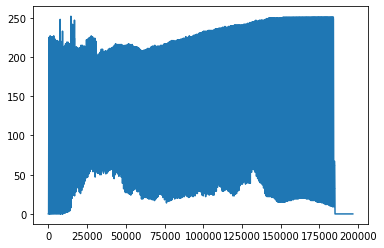

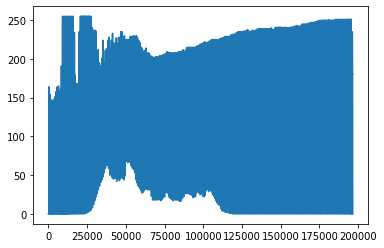

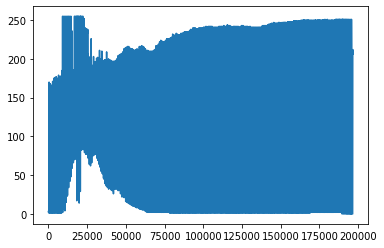

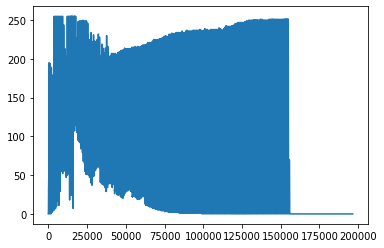

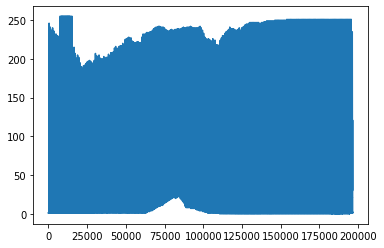

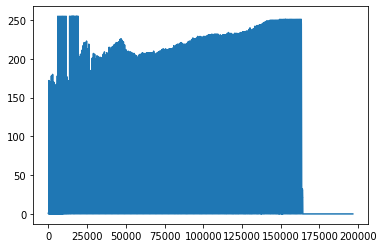

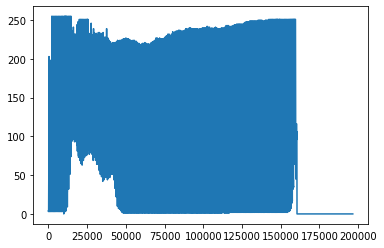

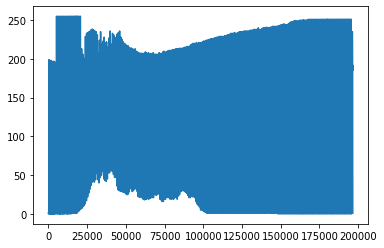

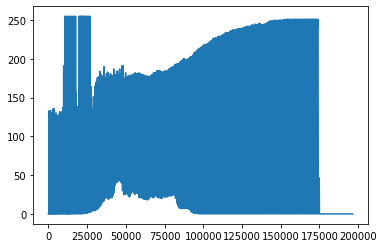

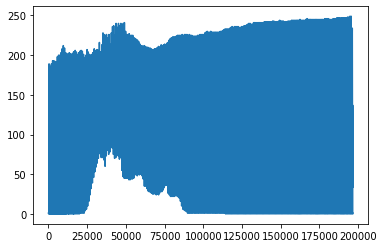

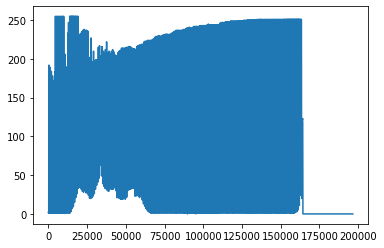

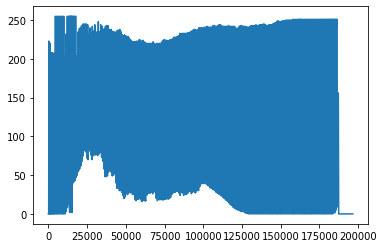

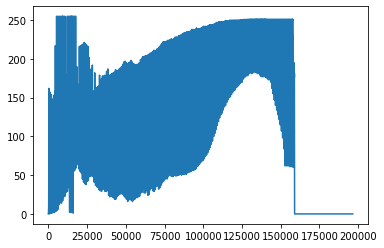

In [20]:
for i in imageTest:
  # plt.plot(i.reshape(-1))
  plt.plot(i.reshape(-1))

  plt.show()